<a href="https://colab.research.google.com/github/sriramabonam/Data-Science-Portfolio/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


from google.colab import files
files.upload()

In [0]:
from google.colab import files
data = files.upload()

Saving wc-at.csv to wc-at.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [0]:
wcat = pd.read_csv('/content/wc-at.csv')

In [0]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [0]:
wcat.columns

Index(['Waist', 'AT'], dtype='object')

<function matplotlib.pyplot.show>

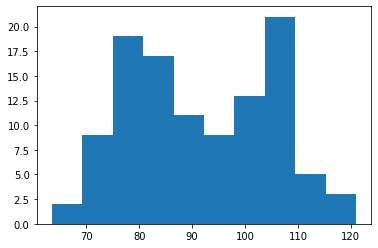

In [0]:
plt.hist(wcat.Waist)
plt.show

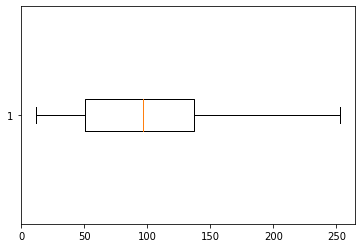

In [0]:
plt.boxplot(wcat.AT, vert= False)
plt.show()

In [0]:
wcat.AT.corr(wcat.Waist)

0.818557812895853

In [0]:
np.corrcoef(wcat.AT,wcat.Waist)

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

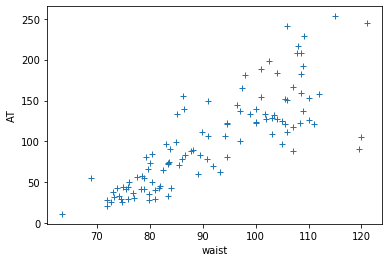

In [0]:
plt.plot(wcat.Waist,wcat.AT,"+")
plt.xlabel("waist")
plt.ylabel("AT")
plt.show()

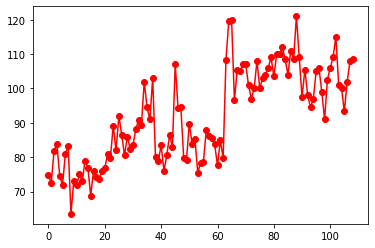

In [0]:
plt.plot(np.arange(109),wcat.Waist,"ro-")
plt.show()

In [0]:
import statsmodels.formula.api as smf

In [0]:
model=smf.ols("AT~Waist", data=wcat).fit()

In [0]:
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [0]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 26 Dec 2019   Prob (F-statistic):           1.62e-27
Time:                        12:24:29   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
model.conf_int(0.05)

In [0]:
pred = model.predict(wcat)

In [0]:
import matplotlib.pylab as plt

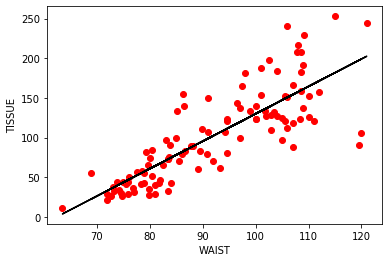

In [0]:
plt.scatter(x=wcat['Waist'], y=wcat['AT'],color='red')
plt.plot(wcat['Waist'],pred,color='black')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')
plt.show()

In [0]:
pred = model.predict(wcat)

In [0]:
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [0]:
pred.corr(wcat.AT)

0.8185578128958535

In [0]:
model2 = smf.ols('AT~np.log(Waist)', data=wcat).fit()

In [0]:
model2.params

Intercept       -1328.341989
np.log(Waist)     317.135564
dtype: float64

In [0]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Thu, 26 Dec 2019   Prob (F-statistic):           6.80e-28
Time:                        12:47:18   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
model3 = smf.ols('np.log(AT)~Waist', data=wcat).fit()

In [0]:
model3.params

Intercept    0.741021
Waist        0.040252
dtype: float64

In [149]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Thu, 26 Dec 2019   Prob (F-statistic):           2.68e-30
Time:                        13:15:41   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""